In [5]:
import pandas as pd
listings = pd.read_csv(r'C:\Users\pseudomonger\source\repos\analytics\airbnbPYTHON\Airbnb Data\Listings.csv', encoding="ISO-8859-1", low_memory=False)
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [6]:
#cast host_since, was object want datetime
listings["host_since"] = pd.to_datetime(listings["host_since"])
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [7]:
#only want paris related listings data
paris_listings = listings.query("city == 'Paris'").loc[:, ["host_since", "neighbourhood", "city", "accommodates", "price"]]
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [20]:
# check for missing vals
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [21]:
# check if reasonable
paris_listings.describe()
# minimum price zero? probably bad

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [22]:
paris_listings.query("accommodates == 0 and price == 0").count()
#54 counts of both, 62 for price, but an insubstantial count considering the size of the data, could be removed or fixed though

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [19]:
# find price by neighborhood, price by accommodation, and listings over time so that we can visualize the differences in neighborhood paris listings prices by neighbourhood size and time
# sorting neighbourhood by price
paris_listings_neighbourhood = (paris_listings.groupby("neighbourhood").agg({"price":"mean"}).sort_values("price")) #price is in euros
paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [18]:
paris_listings_accommodate = (paris_listings.query("neighbourhood == 'Elysee'").groupby("accommodates").agg({"price":"mean"}).sort_values("price"))
paris_listings_accommodate.tail()#16 accommodations cheaper than 14?

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


In [ ]:
paris_listings_accommodate = (paris_listings.query("neighbourhood == 'Elysee'").groupby("accommodates").agg({"price":"mean", "neighbourhood":"count"}).sort_values("price"))
paris_listings_accommodate.tail()
#only one listing at 16 so probably normal price variation

In [16]:
paris_listings_over_time = (paris_listings.set_index("host_since").resample("Y").agg({"neighbourhood" : "count", "price":"mean"}))
paris_listings_over_time.head()

C:\Users\pseudomonger\AppData\Local\Temp\ipykernel_2308\2158420489.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  paris_listings_over_time = (paris_listings.set_index("host_since").resample("Y").agg({"neighbourhood" : "count", "price":"mean"}))


,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


In [24]:
from matplotlib import style

In [25]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [86]:
style.use("seaborn-v0_8-talk")

<Axes: title={'center': 'Average Listing Price by Paris Neighbourhood'}, xlabel='Price per night (Euros)', ylabel='Neighbourhood'>

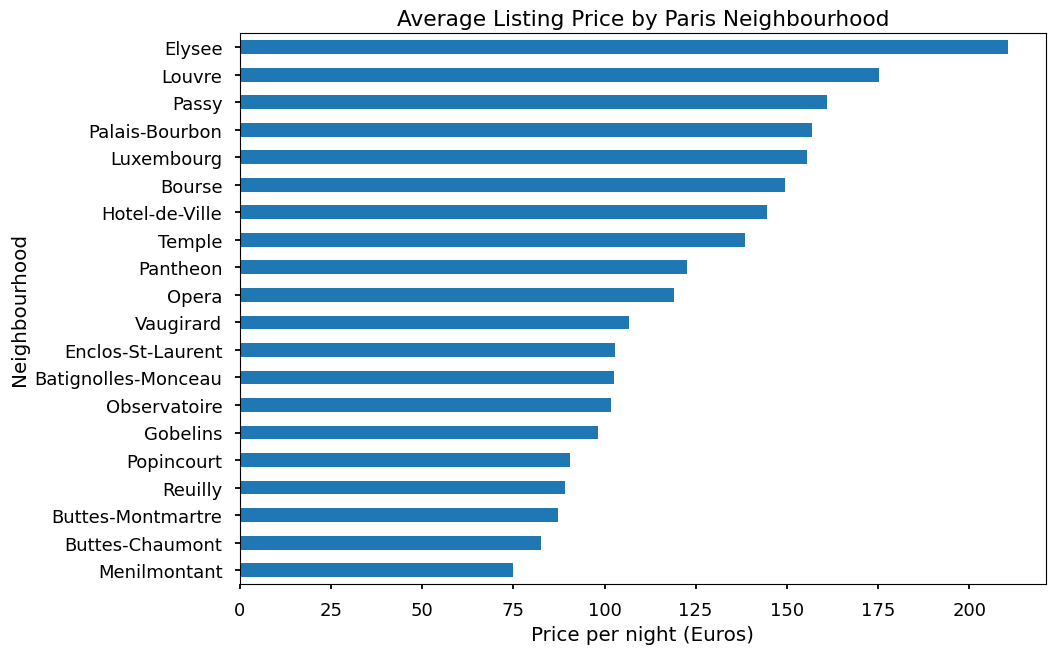

In [87]:
(paris_listings_neighbourhood.plot.barh(title="Average Listing Price by Paris Neighbourhood", xlabel= "Price per night (Euros)", ylabel = "Neighbourhood", legend=None))

<Axes: title={'center': 'Average Listing Price by Accommodation Capacity'}, xlabel='Price per night (Euros)', ylabel='Accommodation capacity'>

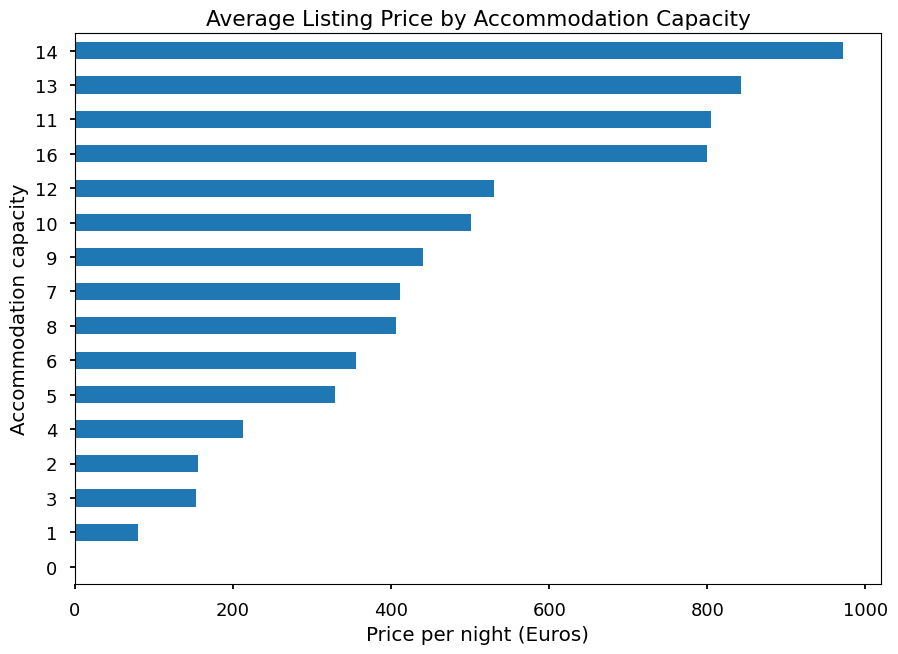

In [88]:
(paris_listings_accommodate.plot.barh(title="Average Listing Price by Accommodation Capacity", xlabel= "Price per night (Euros)", ylabel = "Accommodation capacity", legend=None))

<Axes: title={'center': 'New AirBnb hosts in Paris Over Time'}, xlabel='Time', ylabel='Hosts'>

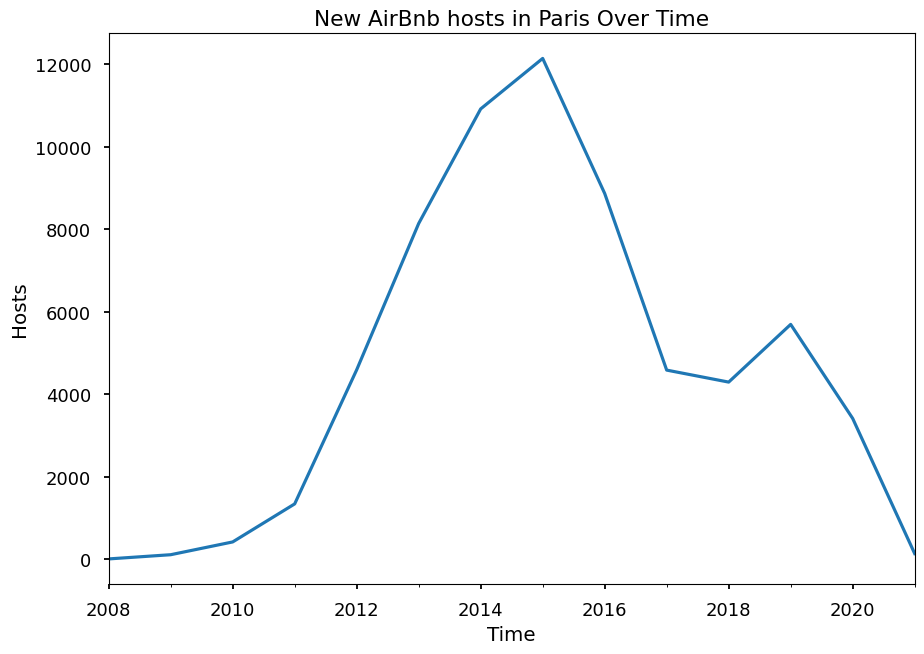

In [89]:
paris_listings_over_time["neighbourhood"].plot(ylabel="Hosts",xlabel="Time", title = "New AirBnb hosts in Paris Over Time")
#large peak at 2015 with a steep decline post restriction

<Axes: title={'center': 'Average AirBnb Price in Paris Over Time'}, xlabel='Time', ylabel='Avereage Price (Euros)'>

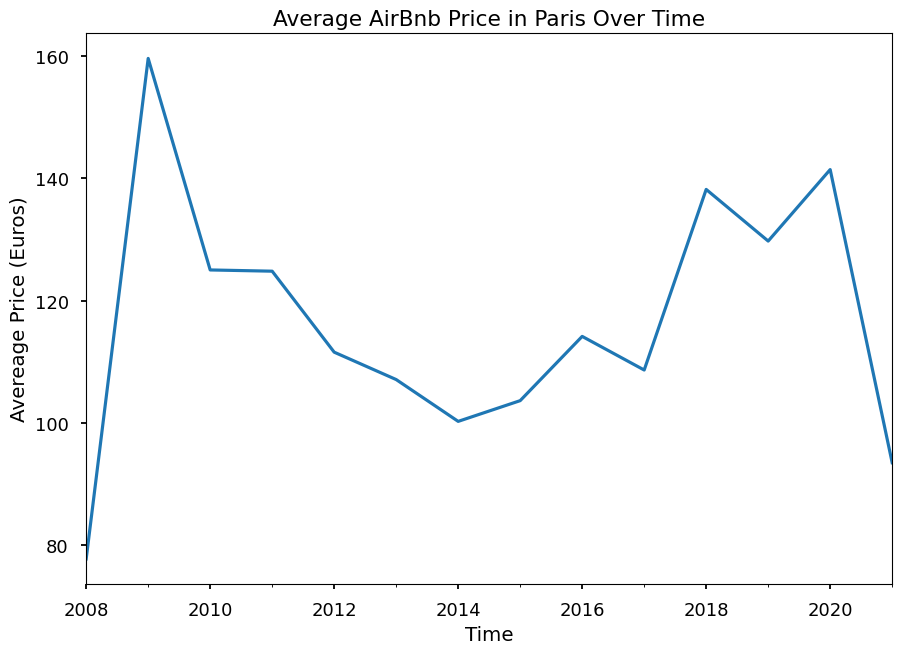

In [90]:
paris_listings_over_time["price"].plot(ylabel="Avereage Price (Euros)",xlabel="Time", title = "Average AirBnb Price in Paris Over Time")
#As things got more competative prices decreased then rise again post regulation, this is not PROVEN just noticing a pattern that that could be correlation without causation

Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts, Higher Prices')

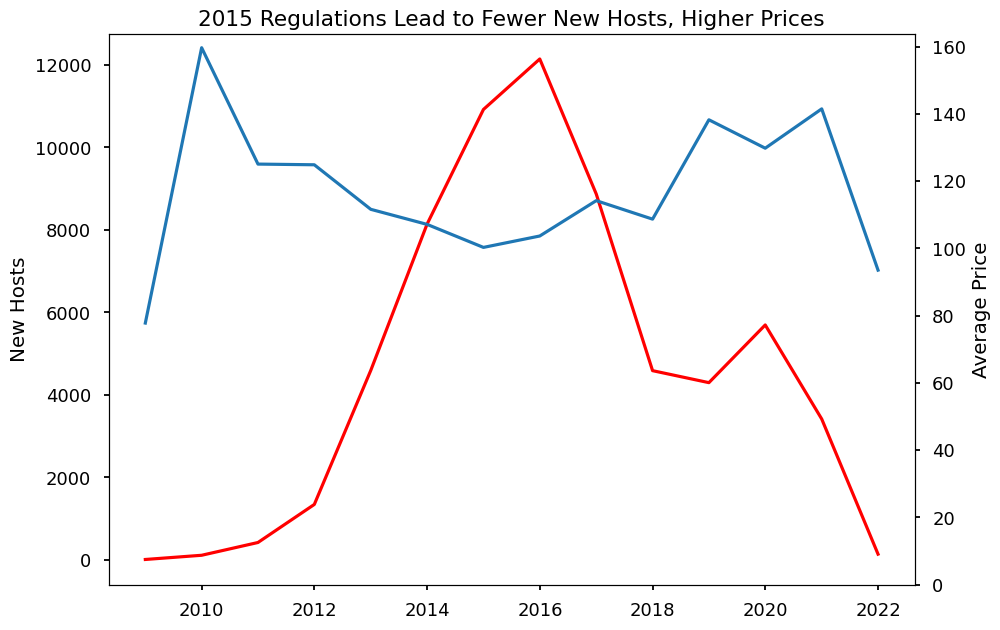

In [92]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(paris_listings_over_time.index, paris_listings_over_time["neighbourhood"],label="New Hosts", c="red" )
ax.set_ylabel ("New Hosts")

ax2 = ax.twinx()
ax2.plot(paris_listings_over_time.index, paris_listings_over_time["price"],label="Average Price" )
ax2.set_ylim(0)
ax2.set_ylabel ("Average Price")
ax.set_title("2015 Regulations Lead to Fewer New Hosts, Higher Prices")